# Finding the Two Best Markets for Ads

#### Table of Contents
* [Introduction](#1)
* [Data Exploration](#2)
* [Checking for Sample Representativity](#3)
* [New Coders - Location and Densities](#4)
* [Evaluate Spending](#5)
* [Re-evaluate the data](#6)
* [Conclusion](#7)

#### Introduction <a class='anchor' id='1'></a>

Let's assume that we're working for an an e-learning company that offers courses on programming. Most of our courses are on web and mobile development, but we also cover many other domains, like data science, game development, etc. We want to promote our product and we'd like to invest some money in advertisement. 

#### Goal

Our goal in this project is to find out the two best markets to advertise our product in.

To reach our goal, we could organize surveys for a couple of different markets to find out which would the best choices for advertising. This is very costly, however, and it's a good call to explore cheaper options first.

We can try to search existing data that might be relevant for our purpose. One good candidate is the data from freeCodeCamp's 2017 New Coder Survey. freeCodeCamp is a free e-learning platform that offers courses on web development. Because they run a popular Medium publication (over 400,000 followers), their survey attracted new coders with varying interests (not only web development), which is ideal for the purpose of our analysis.

The survey data is publicly available in this GitHub repository.

#### Data Exploration: '2017-fCC-New-Coders-Survey-Data.csv' <a class='anchor' id='2'></a>

In [53]:
#Import libraries
import pandas as pd, re
import matplotlib.pyplot as plt
%matplotlib inline

import statsmodels.api as sm
import numpy as np

#survey_data = pd.read_csv("D:/DataQuest/2017-new-coder-survey-part-1.csv")
survey_data = pd.read_csv("D:/DataQuest/2017-fCC-New-Coders-Survey-Data.csv", low_memory=False)
survey_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18175 entries, 0 to 18174
Columns: 136 entries, Age to YouTubeTheNewBoston
dtypes: float64(105), object(31)
memory usage: 18.9+ MB


In [54]:
survey_data.head(5)

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,...,YouTubeFCC,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston
0,27.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,34.0,0.0,NaN,NaN,NaN,NaN,NaN,"less than 100,000",NaN,NaN,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,21.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN
3,26.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,...,1.0,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
4,20.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


For the purpose of our analysis, we want to answer questions about a population of new coders that are interested in the subjects we teach. We'd like to know:

Where are these new coders located.

What are the locations with the greatest number of new coders.

How much money new coders are willing to spend on learning.



#### Checking for Sample Representativity <a class='anchor' id='3'></a>

Before starting to analyze the sample data we have, we need to clarify whether it's representative for our population of interest and it has the right categories of people for our purpose.

In [55]:
# The JobRoleInterest column describes for every participant the role(s) they'd be interested in working.
job_interest = survey_data['JobRoleInterest'].value_counts(normalize=True)
job_interest

JobRoleInterest
Full-Stack Web Developer                                                                                                                                                                                                                                                                    0.117706
  Front-End Web Developer                                                                                                                                                                                                                                                                   0.064359
  Data Scientist                                                                                                                                                                                                                                                                            0.021739
Back-End Web Developer                                                                                   

The focus of our courses is on web and mobile development. How many people are interested in at least one of these two subjects?

In [56]:
percent = 0
target = ['web','Web','mobile','Mobile'] # We will target any of these words in the column index
for row,i in zip(job_interest.index,job_interest):
    for x in target:
        if x in row:
            percent += i
            break
print(f'{round(percent*100,2)}%')


86.31%


86.31% of the respondents in the survey had interest in at least mobile or web development.

In [57]:
#import re, import this above
#Create function to check for target words in JobRoleInterest
def check_interest(series):
    if re.search(r"(?i)web", series):
        return True
    elif re.search(r'(?i)mobile', series):
        return True
    else:
        return False

survey_data['JobRoleInterest'] = survey_data['JobRoleInterest'].astype(str)
survey_data['Interest'] = survey_data['JobRoleInterest'].apply(check_interest)


In [58]:
survey_data['Interest'].value_counts() #noted a surprising amount of False counts


Interest
False    12140
True      6035
Name: count, dtype: int64

In [59]:
survey_data[survey_data['Interest'] == False]['JobRoleInterest'] #Noted that these False counts are likely nan values

0        nan
5        nan
7        nan
8        nan
10       nan
        ... 
18168    nan
18169    nan
18170    nan
18172    nan
18173    nan
Name: JobRoleInterest, Length: 12140, dtype: object

In [60]:
survey_data[survey_data['Interest'] == False]['JobRoleInterest'].value_counts() #Confirm thta majority are nan values

JobRoleInterest
nan                                                                                              11183
  Data Scientist                                                                                   152
Game Developer                                                                                     114
Information Security                                                                                92
  Product Manager                                                                                   55
                                                                                                 ...  
Information Security, Data Engineer,   Data Scientist,   Quality Assurance Engineer                  1
  Product Manager, Information Security,   Data Scientist                                            1
Data Engineer,   Product Manager, Information Security,   Data Scientist,   DevOps / SysAdmin        1
  Quality Assurance Engineer, Information Security       

In [61]:
webmobile_interest = survey_data[survey_data['JobRoleInterest'] != 'nan']
webmobile_interest['Interest'].value_counts(normalize=True) #Filter out nan values and recheck that it is indeed 86%

Interest
True     0.863129
False    0.136871
Name: proportion, dtype: float64

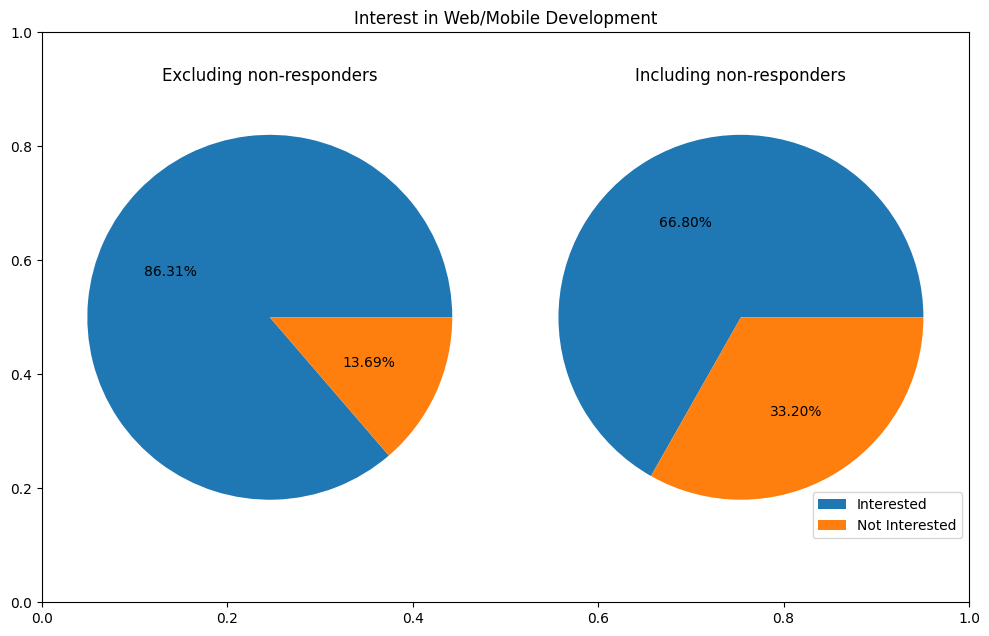

Axes(0.0467222,0.025;0.927278x0.95)


In [62]:
# import matplotlib.pyplot as pyplot, we import this above

web_graph = webmobile_interest['Interest'].value_counts(normalize=True)
axes, fig = plt.subplots(figsize=(10,6))
ax1 = plt.subplot(1,2,1)
ax2 = plt.subplot(1,2,2)
labels=['Interested','Not Interested']
fig.set_title('Interest in Web/Mobile Development')

ax1.pie(web_graph,  autopct='%.2f%%')
ax1.set_title('Excluding non-responders')
ax2.pie(survey_data['Interest'].value_counts(normalize=True), autopct='%.2f%%')
ax2.set_title('Including non-responders')
plt.tight_layout()
plt.legend(['Interested','Not Interested'], loc='lower right')
plt.show()
print(fig)

#### New Coders - Location and Densities <a class='anchor' id='4'></a>

Now that we found out that the sample has the right categories of people for our purpose, we can begin analyzing it. We can start with finding out where these new coders are located, and what are the densities (how many coders there are) for each location.

For our analysis, we'll work with the CountryLive variable because we're interested where people actually live at the moment when we run the ads. Because the data set provides information at a country level, we can think of each country as an individual market. This means we can frame our goal as finding the two best countries to advertise in.

In [63]:
web_table = webmobile_interest['CountryLive'].value_counts() #Generate frequency table to evaluate which market has most potential
web_table

CountryLive
United States of America    3125
India                        528
United Kingdom               315
Canada                       260
Poland                       131
                            ... 
Liberia                        1
Papua New Guinea               1
Guadeloupe                     1
Gibraltar                      1
Gambia                         1
Name: count, Length: 137, dtype: int64

In [64]:
webmobile_interest['CountryLive'].value_counts(normalize=True)


CountryLive
United States of America    0.457005
India                       0.077216
United Kingdom              0.046066
Canada                      0.038023
Poland                      0.019158
                              ...   
Liberia                     0.000146
Papua New Guinea            0.000146
Guadeloupe                  0.000146
Gibraltar                   0.000146
Gambia                      0.000146
Name: proportion, Length: 137, dtype: float64

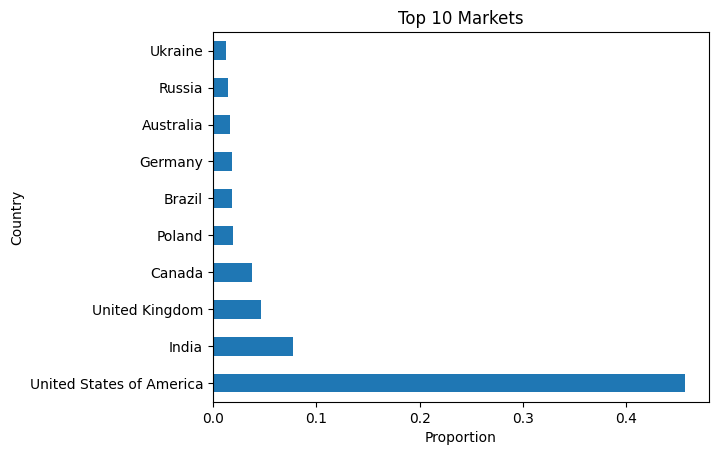

In [65]:
webmobile_interest['CountryLive'].value_counts(normalize=True).head(10).plot.barh()
plt.title('Top 10 Markets')
plt.ylabel('Country')
plt.xlabel('Proportion')
plt.show()

In [66]:
web_table.head(2)

CountryLive
United States of America    3125
India                        528
Name: count, dtype: int64

In [67]:
web_table.head(2).sum()


3653

In [68]:
z_stat, p_value = sm.stats.proportions_ztest([3125, 528], [3653, 3653])
print(f"Z-statistic: {z_stat}")
print(f"P-value: {p_value}")
alpha = 0.05
if p_value < alpha:
    print("The difference in proportions is statistically significant.")
else:
    print("There is no significant difference in proportions.")

Z-statistic: 60.76620457004324
P-value: 0.0
The difference in proportions is statistically significant.


The United States of America and India have the most potential customers - with US being the top market.

#### Evaluate Spending <a class='anchor' id='5'></a>

We need to go more in depth with our analysis before taking a decision. We can continue by figuring out how much money new coders are actually willing to spend on learning. Advertising within markets where most people are only willing to learn for free is extremely unlikely to be profitable for us.

The MoneyForLearning column describes in American dollars the amount of money spent by participants from the moment they started coding until the moment they completed the survey. Our company sells subscriptions at a price of $59 per month, and for this reason we're interested in finding out how much money each student spends per month.

It also seems like a good idea to narrow down our analysis to only four countries: the US, India, the United Kingdom, and Canada (Top 4 markets)

In [69]:
webmobile_interest['MoneyForLearning']

1           80.0
2         1000.0
3            0.0
4            0.0
6            0.0
          ...   
18161        0.0
18162        0.0
18163        0.0
18171    10000.0
18174        NaN
Name: MoneyForLearning, Length: 6992, dtype: float64

In [70]:
#convert 0 months to 1 month (for those who just started)
webmobile_interest.loc[:,'MonthsProgramming'] = webmobile_interest['MonthsProgramming'].astype(str)
webmobile_interest.loc[:,'MonthsProgramming'] = webmobile_interest['MonthsProgramming'].str.replace('0.0','1.0')
webmobile_interest.loc[:,'MonthsProgramming'] = webmobile_interest['MonthsProgramming'].astype(float)

In [101]:
webmobile_interest.loc[:,'Money_per_month'] = webmobile_interest['MoneyForLearning'] / webmobile_interest['MonthsProgramming']
webmobile_interest.loc[:,'Money_per_month'] #calculate spending per month

1        13.333333
2            200.0
3              0.0
4              0.0
6              0.0
           ...    
18157          0.0
18160    33.333333
18161          0.0
18162          0.0
18171      10000.0
Name: Money_per_month, Length: 6212, dtype: object

In [72]:
webmobile_interest['Money_per_month'].isnull().sum() #find total null values

675

In [73]:
webmobile_interest = webmobile_interest.dropna(subset=['Money_per_month']) #drop rows with null values in money_per_month
webmobile_interest['Money_per_month'].isnull().sum()

0

In [74]:
webmobile_interest['CountryLive'].isnull().sum()
webmobile_interest = webmobile_interest.dropna(subset=['CountryLive']) #drop rows with null values in money_per_month

In [75]:
webmobile_interest['CountryLive'].isnull().sum()

0

In [76]:
money_nation = webmobile_interest[['Money_per_month','CountryLive']].groupby('CountryLive').mean()
money_nation.sort_values(by= 'Money_per_month',ascending=False)

,Money_per_month
CountryLive,
Yemen,10000.0
Puerto Rico,4291.394558
Austria,936.193089
Spain,784.279149
Jamaica,747.037037
...,...
Honduras,0.0
Jordan,0.0
Mozambique,0.0


In [77]:
top_4_markets = money_nation[(money_nation.index == 'Canada') | (money_nation.index == 'United States of America') | (money_nation.index == 'United Kingdom') | (money_nation.index == 'India')]
top_4_markets.sort_values(by='Money_per_month',ascending=False)

,Money_per_month
CountryLive,
United States of America,227.60512
India,134.23458
Canada,112.937095
United Kingdom,45.489666


In [78]:
money_nation = webmobile_interest[['Money_per_month','CountryLive']].groupby('CountryLive').median()
top_4_markets = money_nation[(money_nation.index == 'Canada') | (money_nation.index == 'United States of America') | (money_nation.index == 'United Kingdom') | (money_nation.index == 'India')]
top_4_markets.sort_values(by='Money_per_month',ascending=False)

,Money_per_month
CountryLive,
United States of America,3.333333
Canada,0.0
India,0.0
United Kingdom,0.0


In [79]:
countries=['India','United States of America','Canada','United Kingdom']
money_nation = webmobile_interest[['Money_per_month','CountryLive']].groupby('CountryLive')['Money_per_month'].apply(lambda x: x.mode().iloc[0]).reset_index()
money_nation[money_nation['CountryLive'].isin(countries)]

,CountryLive,Money_per_month
19,Canada,0.0
52,India,0.0
121,United Kingdom,0.0
122,United States of America,0.0


In [80]:
usa = webmobile_interest[webmobile_interest['CountryLive']=='United States of America']['Money_per_month']

In [81]:
usa = usa.astype(float)
usa.describe()

count     2933.000000
mean       227.605120
std       1939.878021
min          0.000000
25%          0.000000
50%          3.333333
75%         50.000000
max      80000.000000
Name: Money_per_month, dtype: float64

#### Re-evaluate the data <a class='anchor' id='6'></a>

We will generate boxplots of the 4 countries for comparison.

In [82]:
webmobile_interest[webmobile_interest['CountryLive']=='United Kingdom']['Money_per_month']

6               0.0
22       285.714286
133       35.416667
158            10.0
164            50.0
            ...    
17754           0.0
17905           0.0
17954           0.0
17961           0.0
17971          15.0
Name: Money_per_month, Length: 279, dtype: object

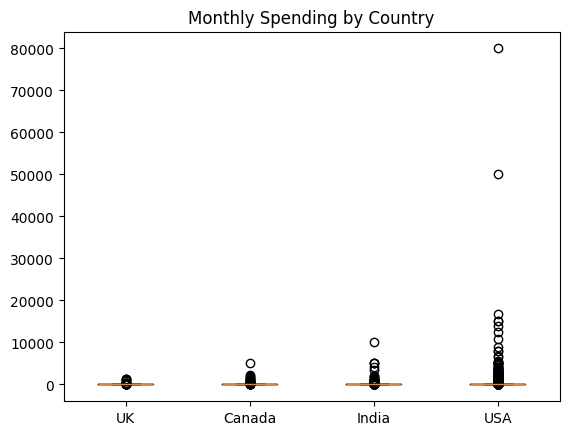

In [83]:
plt.boxplot([webmobile_interest[webmobile_interest['CountryLive']=='United Kingdom']['Money_per_month'],
            webmobile_interest[webmobile_interest['CountryLive']=='Canada']['Money_per_month'],
            webmobile_interest[webmobile_interest['CountryLive']=='India']['Money_per_month'],
            webmobile_interest[webmobile_interest['CountryLive']=='United States of America']['Money_per_month']], 
            labels=['UK','Canada','India','USA'])
plt.title('Monthly Spending by Country')
plt.show()

From the mean, median, mode of the 4 markets, we see that the results are heavily skewed by potential outliers or heavy spenders. The majority of people do not spend much money. In the US market, 75% of people spend $50 and less.

In [84]:
can = webmobile_interest[webmobile_interest['CountryLive']=='Canada']['Money_per_month']
can = can.astype(float)
can.describe(percentiles=[0.9975])

count     240.000000
mean      112.937095
std       439.959600
min         0.000000
50%         0.000000
99.8%    3408.957083
max      5000.000000
Name: Money_per_month, dtype: float64

In [85]:
uk = webmobile_interest[webmobile_interest['CountryLive']=='United Kingdom']['Money_per_month']
uk = uk.astype(float)
uk.describe(percentiles=[0.9975])

count     279.000000
mean       45.489666
std       162.313908
min         0.000000
50%         0.000000
99.8%    1295.750000
max      1400.000000
Name: Money_per_month, dtype: float64

In [86]:
i = webmobile_interest[webmobile_interest['CountryLive']=='India']['Money_per_month']
i = i.astype(float)
i.describe(percentiles=[0.9975])

count      463.000000
mean       134.234580
std        691.819507
min          0.000000
50%          0.000000
99.8%     5000.000000
max      10000.000000
Name: Money_per_month, dtype: float64

In [87]:
usa = webmobile_interest[webmobile_interest['CountryLive']=='United States of America']['Money_per_month']
usa = usa.astype(float)
usa.describe(percentiles=[0.9975])

count     2933.000000
mean       227.605120
std       1939.878021
min          0.000000
50%          3.333333
99.8%    10228.333333
max      80000.000000
Name: Money_per_month, dtype: float64

Let's remove all the values above 2 stds.

In [88]:
can_clean = can[can.iloc[:]<3408.957083]
can_clean

55          0.000000
64         50.000000
89          1.052632
139         2.777778
292         0.000000
            ...     
17818       4.166667
17911    1047.619048
17940      25.000000
18006      14.285714
18041      13.888889
Name: Money_per_month, Length: 239, dtype: float64

In [89]:
uk_clean = uk[uk.iloc[:]<1295.750000]
uk_clean

6          0.000000
22       285.714286
133       35.416667
158       10.000000
164       50.000000
            ...    
17754      0.000000
17905      0.000000
17954      0.000000
17961      0.000000
17971     15.000000
Name: Money_per_month, Length: 278, dtype: float64

In [90]:
i_clean = i[i.iloc[:]<5000.000000]
i_clean

52          0.000000
58          0.000000
118         0.000000
137        18.750000
168         0.416667
            ...     
16199      20.833333
17745       0.000000
18107     275.000000
18111     200.000000
18156    1000.000000
Name: Money_per_month, Length: 459, dtype: float64

In [91]:
usa_clean = usa[usa.iloc[:]<10228.333333]
usa_clean

1         13.333333
2        200.000000
15         0.000000
16        16.666667
18        35.714286
            ...    
18069      0.000000
18071      7.500000
18093     27.777778
18113      0.000000
18130      0.000000
Name: Money_per_month, Length: 2925, dtype: float64

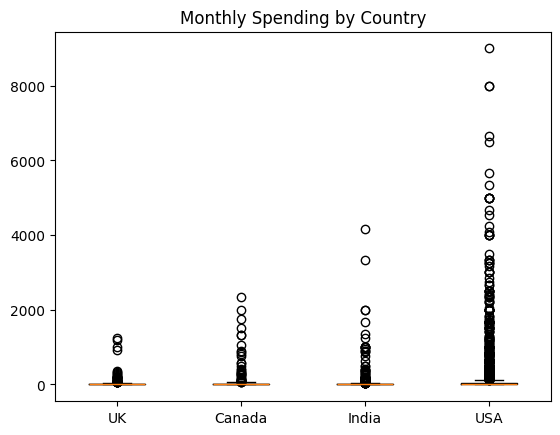

In [92]:
plt.boxplot([uk_clean,
            can_clean,
            i_clean,
            usa_clean], 
            labels=['UK','Canada','India','USA'])
plt.title('Monthly Spending by Country')
plt.show()

In [93]:
uk_clean.describe()


count     278.000000
mean       40.617327
std       140.689840
min         0.000000
25%         0.000000
50%         0.000000
75%        20.000000
max      1250.000000
Name: Money_per_month, dtype: float64

In [94]:
i_clean.describe()


count     459.000000
mean       80.938150
std       335.184346
min         0.000000
25%         0.000000
50%         0.000000
75%        12.500000
max      4166.666667
Name: Money_per_month, dtype: float64

In [95]:
usa_clean.describe()

count    2925.000000
mean      155.065236
std       589.960409
min         0.000000
25%         0.000000
50%         3.333333
75%        50.000000
max      9000.000000
Name: Money_per_month, dtype: float64

In [96]:
can_clean.describe()

count     239.000000
mean       92.489133
std       305.953457
min         0.000000
25%         0.000000
50%         0.000000
75%        25.000000
max      2337.166667
Name: Money_per_month, dtype: float64

In [97]:
can_db = pd.DataFrame({"Monthly_spending": can_clean, "Country":'Canada'})
i_db = pd.DataFrame({"Monthly_spending": i_clean, "Country":'India'})
uk_db = pd.DataFrame({"Monthly_spending": uk_clean, "Country":'UK'})
us_db = pd.DataFrame({"Monthly_spending": usa_clean, "Country":'USA'})
can_db

,Monthly_spending,Country
55,0.000000,Canada
64,50.000000,Canada
89,1.052632,Canada
139,2.777778,Canada
292,0.000000,Canada
...,...,...
17818,4.166667,Canada
17911,1047.619048,Canada
17940,25.000000,Canada
18006,14.285714,Canada


In [98]:
combined = pd.concat([can_db, i_db, uk_db, us_db], axis=0)
combined.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3901 entries, 55 to 18130
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Monthly_spending  3901 non-null   float64
 1   Country           3901 non-null   object 
dtypes: float64(1), object(1)
memory usage: 91.4+ KB


In [99]:
combined.groupby('Country').mean().sort_values(by='Monthly_spending', ascending=False)


,Monthly_spending
Country,
USA,155.065236
Canada,92.489133
India,80.938150
UK,40.617327


In [100]:
combined.groupby('Country').count().sort_values(by='Monthly_spending',ascending=False)

,Monthly_spending
Country,
USA,2925
India,459
UK,278
Canada,239


It appears the mean spending for Canada has surpassed India after removing outliers above 2 standard deviations.

#### Conclusion <a class='anchor' id='7'></a>

Considering that we plan to sell subscription at $59 per month and there are more potential customers in India compared to Canada, India appears to be a better market to advertise in because their average spending is still higher than our subscription price even though Canada has higher average spending.

Next steps we may want to consider how to split advertisement budget between the two markets. Does it make sense to split the budget equally between the markets?